In [739]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

# import the train test split
from sklearn.model_selection import train_test_split

In [740]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/home/jovyan


In [741]:
df_oct_updated = pd.read_csv('annual_weather_input.csv')
df_oct_updated.head()

,YEAR,JAN_TMP_HIGH,JAN_TMP_AVG,JAN_TMP_LOW,JAN_DP_HIGH,JAN_DP_AVG,JAN_DP_LOW,JAN_HUM_HIGH,JAN_HUM_AVG,JAN_HUM_LOW,...,DEC_VIS_HIGH,DEC_VIS_AVG,DEC_VIS_LOW,DEC_WIND_HIGH,DEC_WIND_AVG,DEC_PRECIP,DEC_NUMDAY_RAIN,DEC_NUM_DAYS_SNOW,DEC_NUM_DAYS_FOG,DEC_NUM_DAYS_THNDRSTRM
0,1986,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,75.092035,32.839506,...,18.276040,8.111151,0.171012,30.035203,9.005973,13.063238,4.954492,6.141817,16.710648,0.000000
1,1987,51.603404,27.391903,-0.148039,38.817646,20.733436,-8.513812,98.946455,76.677755,34.704932,...,19.391184,9.598138,0.000000,38.844028,11.646561,6.928783,9.977321,8.323399,14.877116,1.181361
2,1988,56.407002,25.686117,-0.995032,46.273711,17.866325,-7.806793,99.867597,73.854349,34.931524,...,19.391184,11.411940,0.000000,29.942347,11.087768,1.484312,4.681702,6.724860,7.015422,0.394821
3,1989,64.166278,30.670111,5.880811,48.648697,22.362794,-1.682774,100.000000,73.753432,32.277209,...,19.391184,10.324949,0.000000,35.840153,9.254137,13.640465,1.860475,11.521330,8.494498,0.000000
4,1990,67.529677,44.554956,25.075437,49.709007,25.711125,4.956941,89.797538,67.230550,27.670203,...,18.300289,9.936429,0.123844,30.633513,10.271417,2.056510,6.864935,6.986234,12.641199,0.388022


In [742]:
price_updated = pd.read_csv('annual_price_input.csv')


In [743]:
price = price_updated['OCT']
input_variables = df_oct_updated.iloc[:,67:-44]
input_variables

,ARP_TMP_HIGH,ARP_TMP_AVG,ARP_TMP_LOW,ARP_DP_HIGH,ARP_DP_AVG,ARP_DP_LOW,ARP_HUM_HIGH,ARP_HUM_AVG,ARP_HUM_LOW,ARP_SEALVL_HIGH,...,OCT_VIS_HIGH,OCT_VIS_AVG,OCT_VIS_LOW,OCT_WIND_HIGH,OCT_WIND_AVG,OCT_PRECIP,OCT_NUMDAY_RAIN,OCT_NUM_DAYS_SNOW,OCT_NUM_DAYS_FOG,OCT_NUM_DAYS_THNDRSTRM
0,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,30.348293,...,19.150249,9.532099,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677
1,85.305443,51.656418,21.970248,53.181639,35.382062,12.721515,98.923711,57.038358,16.507981,30.336701,...,19.391184,11.619537,0.343522,27.792394,9.120230,8.947375,8.870945,0.458632,10.156463,0.873945
2,80.916532,49.536814,24.445530,55.833496,33.898013,11.252577,98.650757,57.738017,20.443700,30.251877,...,19.391184,12.179819,0.409180,29.747539,9.009391,7.362407,7.357805,0.666401,8.015138,2.291965
3,82.188160,50.088594,23.307634,60.465318,37.334599,15.095494,99.196568,64.128090,22.257809,30.500443,...,19.391184,10.837260,0.369291,23.838954,8.859987,6.101477,5.146983,2.093679,11.695868,0.702312
4,82.228676,49.924743,21.476173,57.847267,38.162492,12.174805,99.806560,67.249602,22.315227,30.534811,...,18.300289,12.064565,0.394326,27.722387,8.521498,7.887989,7.766587,0.295717,7.393004,2.227383
5,78.605055,53.820404,31.381112,57.150581,40.051796,18.630522,96.689898,62.528382,22.394981,30.498745,...,18.300289,11.024253,0.033495,32.354100,10.007475,7.313431,11.893625,0.230043,11.369501,4.090926
6,75.811774,49.032761,24.482117,57.732105,37.437558,12.885487,98.427299,67.018538,23.162976,30.543666,...,18.300289,10.961421,0.404168,30.452152,7.910237,6.907019,6.107373,0.460086,7.934819,1.543108
7,72.000800,48.309567,26.817900,55.743052,37.387852,17.228440,97.272763,67.318414,25.186520,30.268472,...,18.300289,12.124182,0.326348,28.713611,8.250608,2.247992,6.037613,1.149486,9.931075,1.596622
8,80.398773,50.705829,20.431745,62.095669,36.414045,11.063032,98.853867,61.438452,18.162264,30.392259,...,18.188921,12.065105,0.336969,31.213816,7.852947,1.188175,5.632127,0.122408,7.864322,0.653398
9,74.787548,48.608425,21.713625,58.307763,36.391915,3.980988,97.352343,65.146269,23.763698,30.309731,...,15.175642,11.481641,0.333018,31.942757,9.160694,3.562179,10.763482,0.623308,9.283446,1.584586


In [744]:
# List of column names

#List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
df_oct_updated.columns = map(str.upper, df_oct_updated.columns)

df_oct_updated.head()

col_names = list(df_oct_updated)



In [745]:
#input_variables[input_variables <= 0] = np.nan
#input_variables_2 = input_variables.drop(input_variables.columns[input_variables.apply(lambda col: col.isnull().sum() >= 1)], axis=1)
#input_variables


# Decision Tree

In [746]:
# Fitting Decision Tree Regression to the dataset

from sklearn.linear_model import LinearRegression

# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.15)


from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Decision Tree: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("DT")

Accuracy of Decision Tree: 0.440577


# Random Forest

In [747]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_10: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_10")

Accuracy of Random Forest_10: 0.635784


In [748]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forest_100: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_100")

Accuracy of Random Forest_100: 0.535857


In [749]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print("Accuracy of Random Forrest_300: %f"%r2_score(y_test,y_pred))

# Store Result and Model Name
model_results.append(r2_score(y_test,y_pred))
model_name.append("RF_300")

Accuracy of Random Forrest_300: 0.496674


# Plot Results of Regression Models

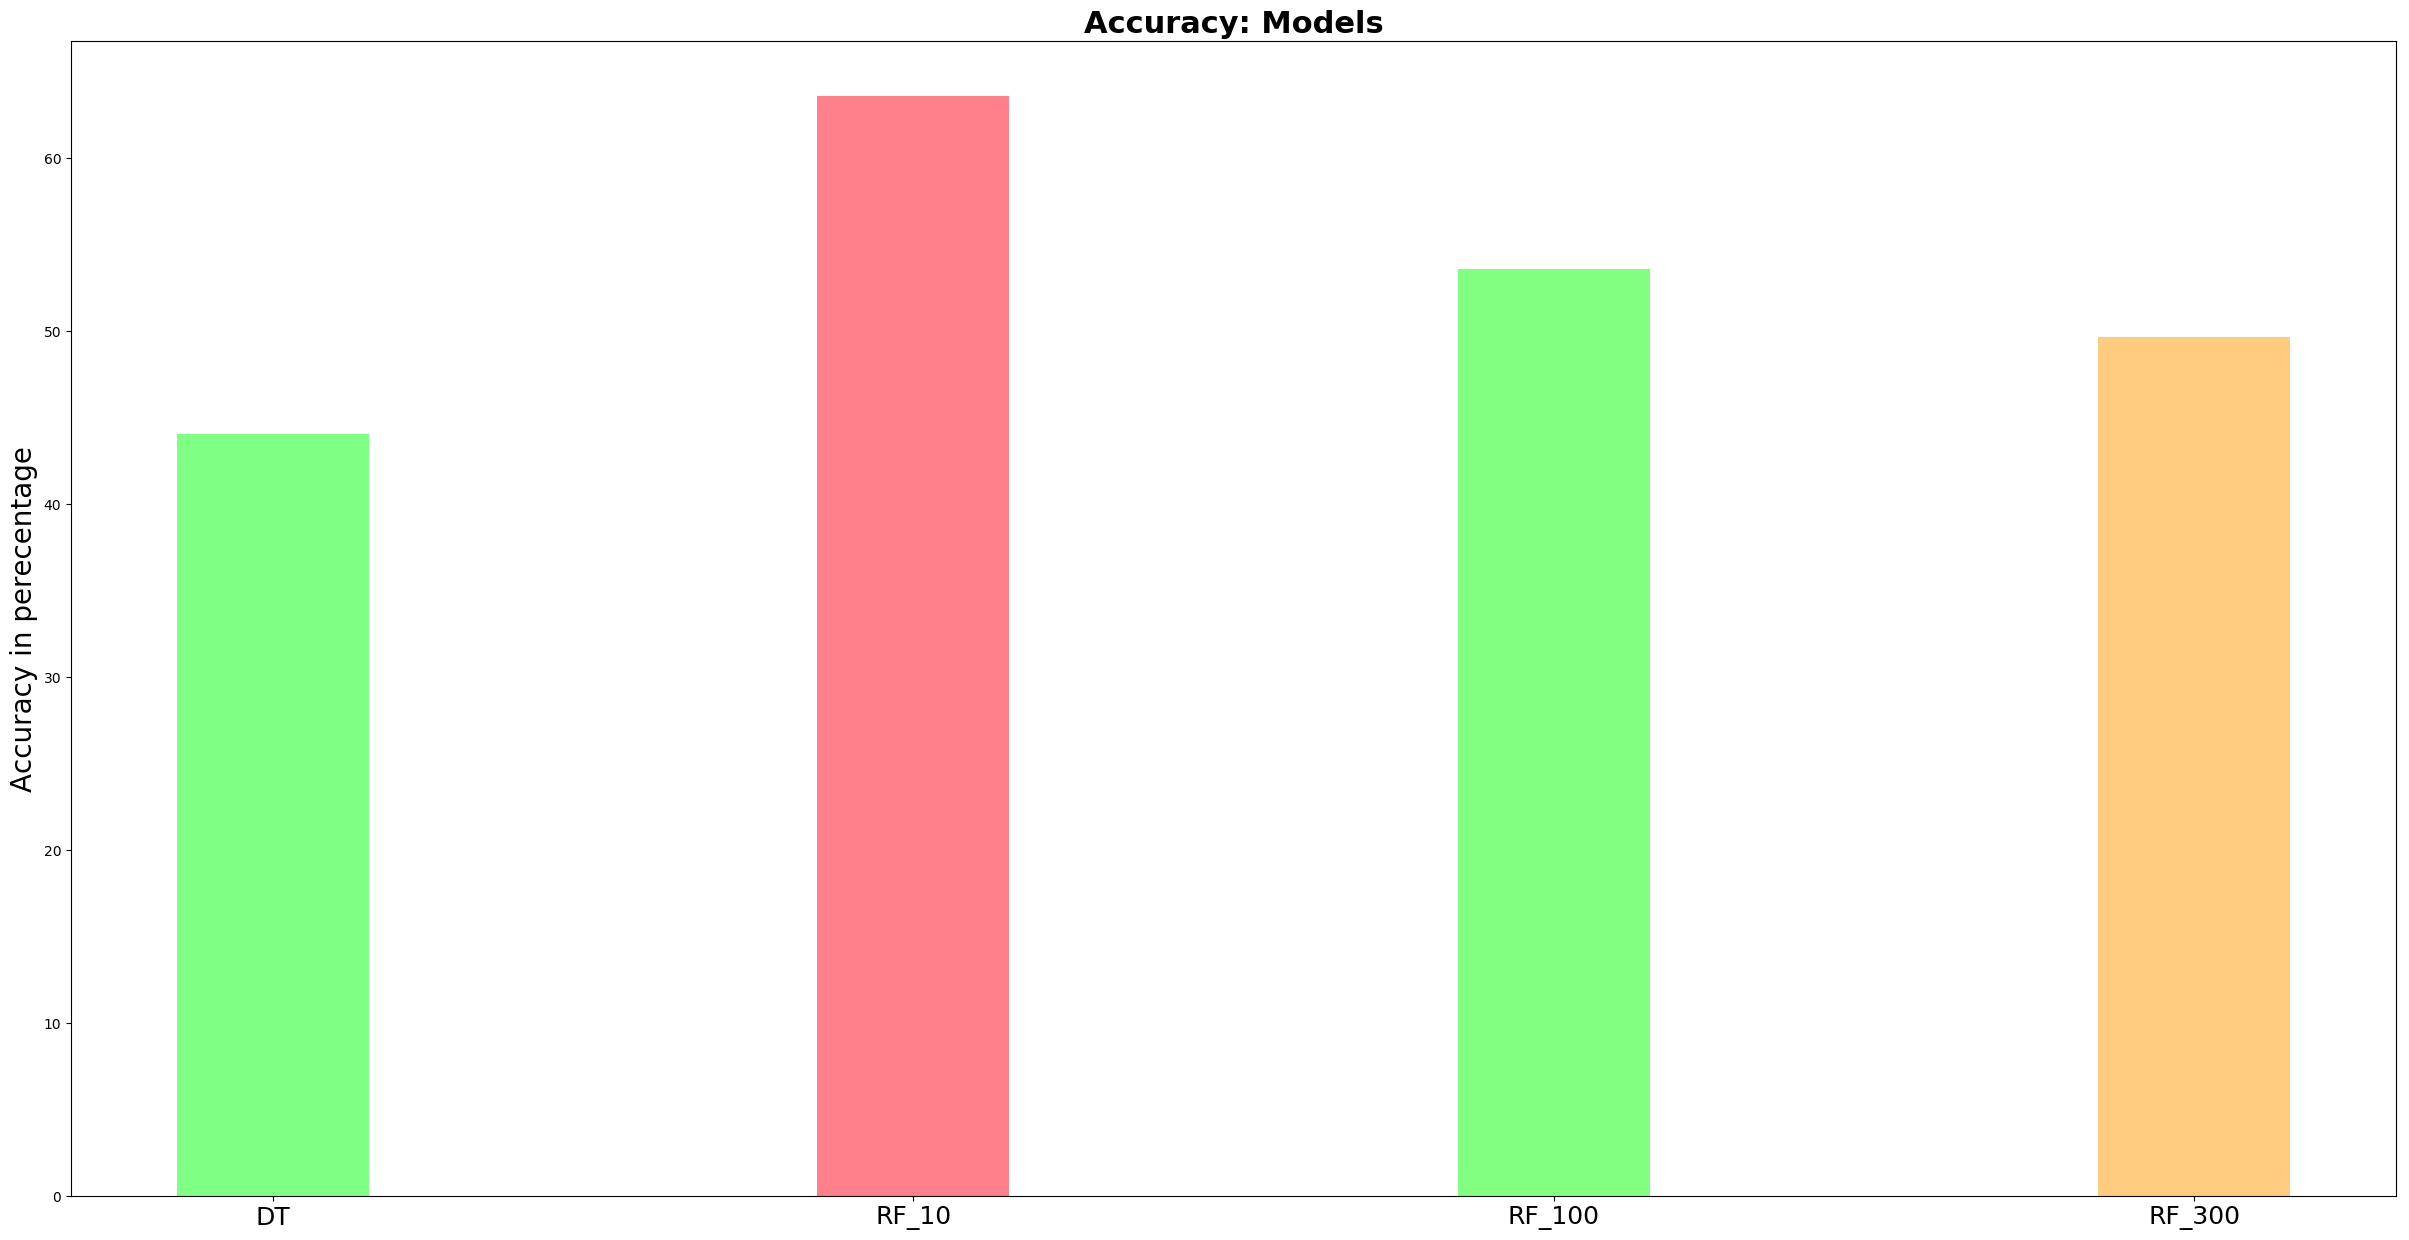

In [750]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.3, color = colors)
plt.xticks(y_pos, model_name, fontsize = 18)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Models', fontsize=22, fontweight='bold')
plt.show()